# The inverted index

The inverted index is an efficient way of representing *terms* in a collection of *documents*. It maps each term to a sequence of documents that contain that term. Let us look at an example of a few popular books

| Book title | text |
|------------|------|
| Harry Potter | Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. |
| Da Vinci Code | Robert Langdon awoke slowly. A telephone was ringing in the darkness—a tinny, unfamiliar ring.|
| Brave New World | A squat grey building of only thirty-four stories. Over the main entrance the words, CENTRAL LONDON HATCHERY AND CONDITIONING CENTRE, and, in a shield, the World State's motto, COMMUNITY, IDENTITY, STABILITY.|
| Norwegian Woods | I was 37 then, strapped in my seat as the huge 747 plunged through dense cloud cover on approach to Hamburg airport. Cold November rains drenched the earth, lending everything the gloomy air of a Flemish landscape. |
| The English patient | She stands up in the garden where she has been working and looks into the distance. She has sensed a shift in the weather.|

A first step is to a so-called *term coincidence matrix*, where for each term in the vocabulary we count how often that term appears in each document. 

|   | Harry Potter | Da Vinci Code | Brave New World | Norwegian Woods | The English Patient |
|---|--------------|---------------|-----------------|-----------------|---------------------|
|the|3              |1              |2                  |4              | 4                  | 
|of|1               |0              |1              |1              | 0                     |
|and|1              |0              |1              |1              | 2                     |
|main|0             |0                 |1           |0              | 0                     |
|...|...|...|...|...|...|


This representation is however not so efficient as it is very sparse: Although common words like _the_, _of_, and _and_ appear in every book, many words are more rare. _Dursley_ appears only in Harry Potter and _Hamburg_ only in Norwegian Woods. In fact, in the above example out of the 108 unique words, 93 words can only be found in one the five books. In this example we dealt with 5 documents that are relatively short, but in practice we usually deal with collections of dozens to thousands of documents each with dozens to hundreds of pages. Saving all the data in the form of a term coincidence matrix like above is then not so efficient. Not only do we need a lot of memory to save it, we waste a lot of memory on storing lots of zeros. 

In information retrieval we are more interested in documents that contain certain terms, than documents that do not. One popular approach, if not *the* most popular approach, dealing with this problem is to create an _inverted index_, sometimes also called a hash or lookup table. The vocabulary is now used as an _index_ and for each term we only store the book titles that contain the term. 

In [2]:
from collections import Counter, defaultdict

In [3]:
doc_labels = [
    "Harry Potter",
    "Da Vinci Code",
    "Brave New World",
    "Norwegian Woods",
    "The English patient",
]
docs = [
    "Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.",
    "Robert Langdon awoke slowly. A telephone was ringing in the darkness—a tinny, unfamiliar ring.",
    "A squat grey building of only thirty-four stories. Over the main entrance the words, CENTRAL LONDON HATCHERY AND CONDITIONING CENTRE, and, in a shield, the World State's motto, COMMUNITY, IDENTITY, STABILITY.",
    "I was 37 then, strapped in my seat as the huge 747 plunged through dense cloud cover on approach to Hamburg airport. Cold November rains drenched the earth, lending everything the gloomy air of a Flemish landscape",
    "She stands up in the garden where she has been working and looks into the distance. She has sensed a shift in the weather.",
]
all_terms = []
for doc in docs:
    doc = doc.replace(".", "").replace(",", "")
    terms = doc.split(" ")
    all_terms += terms

vocab = set(all_terms)
coincidence_matrix = defaultdict(lambda: [0, 0, 0, 0, 0])
for i, doc in enumerate(docs):
    for term in vocab:
        if term in doc:
            coincidence_matrix[term][i] = doc.count(term)
print(coincidence_matrix["the"])
print(coincidence_matrix["of"])
print(coincidence_matrix["and"])
print(coincidence_matrix["main"])

[3, 1, 2, 4, 4]
[1, 0, 1, 1, 0]
[1, 0, 0, 1, 2]
[0, 0, 1, 0, 0]


In [4]:
import numpy as np

np.sum(np.array(list(coincidence_matrix.values())) == 0)

396

In [12]:
coincidence_matrix.values()

dict_values([[1, 0, 0, 0, 0], [1, 0, 1, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [2, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [3, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 1, 2], [2, 0, 0, 0, 0], [3, 5, 2, 4, 4], [1, 0, 0, 0, 0], [2, 0, 1, 1, 1], [1, 0, 0, 0, 0], [9, 7, 3, 14, 8], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [2, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [3, 1, 2, 4, 4], [1, 2, 1, 1, 0], [3, 1, 0, 1, 1], [1, 0, 0, 2, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 1, 0, 2, 2], [1, 0, 1, 1, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 1, 0], [1, 0, 0, 0, 0], [2, 0, 2, 1, 1], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 1, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 2, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 1, 0, 0], [0, 0, 1, 0, 0], 

In [15]:
sum([93.0, 5.0, 2.0, 5.0, 3.0])

108.0

In [17]:
zeros = np.sum(np.array(list(coincidence_matrix.values())) == 0)
non_zeros = np.sum(np.array(list(coincidence_matrix.values())) != 0)

non_zeros / (zeros + non_zeros)

0.26666666666666666

(array([93.,  5.,  2.,  5.,  3.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <BarContainer object of 5 artists>)

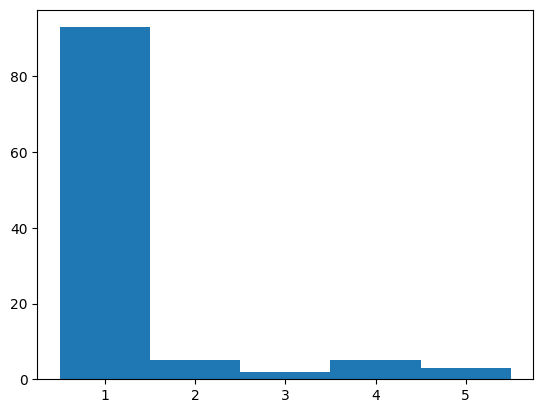

In [14]:
counts = np.sum(np.array(list(coincidence_matrix.values())) != 0, axis=1)
plt.hist(counts, bins=np.arange(0.5, 6.5))

(array([96.,  7.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <BarContainer object of 10 artists>)

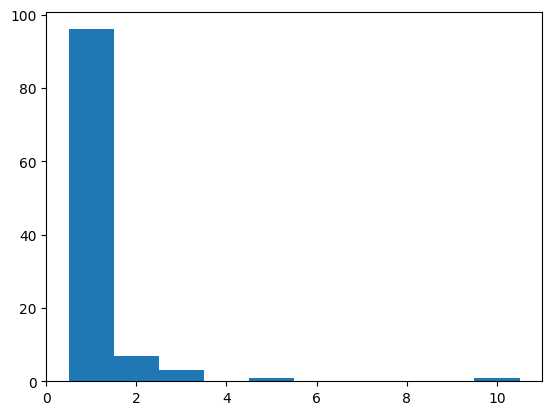

In [11]:
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

counts = list(Counter(all_terms).values())
plt.hist(counts, bins=np.arange(0.5, 11.5))